# 손글씨 숫자 예측 by MLP

In [1]:
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

train_data = MNIST(root='./', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='./', train=False, download=True, transform=ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.65MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.13MB/s]


In [3]:
print(len(train_data), len(test_data))
print(train_data.data.shape)

60000 10000
torch.Size([60000, 28, 28])


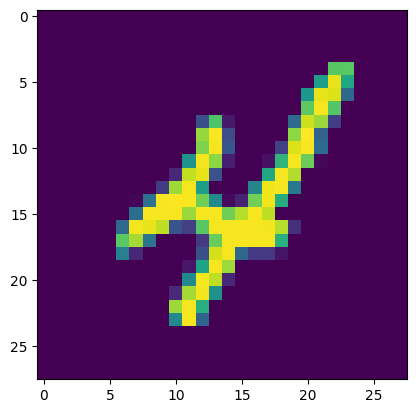

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[9])
plt.show()

In [5]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [7]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [9]:
# MLP 모델
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(128, 64)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = x.view(x.size(0), -1)     # [B, 1, 28, 28] -> [B, 784]
    x = self.relu1(self.fc1(x))
    x = self.relu2(self.fc2(x))
    return self.fc3(x)

model = MLP().to(device)

In [10]:
# 학습
from torch.optim.adam import Adam

learning_rate = 1e-3
optim = Adam(model.parameters(), lr=learning_rate)

for epoch in range(20):
  for data, label in train_loader:
    optim.zero_grad()
    data = torch.reshape(data, (-1, 784)).to(device)
    preds = model(data)

    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    loss.backward()
    optim.step()

  print(f"Epoch {epoch + 1} | Loss: {loss.item():.4f}")

Epoch 1 | Loss: 0.1585
Epoch 2 | Loss: 0.0189
Epoch 3 | Loss: 0.0374
Epoch 4 | Loss: 0.0274
Epoch 5 | Loss: 0.0080
Epoch 6 | Loss: 0.2515
Epoch 7 | Loss: 0.0987
Epoch 8 | Loss: 0.0930
Epoch 9 | Loss: 0.2126
Epoch 10 | Loss: 0.0128
Epoch 11 | Loss: 0.0165
Epoch 12 | Loss: 0.0121
Epoch 13 | Loss: 0.0016
Epoch 14 | Loss: 0.0004
Epoch 15 | Loss: 0.0560
Epoch 16 | Loss: 0.2881
Epoch 17 | Loss: 0.0024
Epoch 18 | Loss: 0.0019
Epoch 19 | Loss: 0.0006
Epoch 20 | Loss: 0.0055


In [11]:
# 모델의 가중치 저장
torch.save(model.state_dict(), "MNIST.pt")

In [12]:
# 모델 로드 (가중치 로드)
model.load_state_dict(torch.load("MNIST.pt", map_location=device))

<All keys matched successfully>

In [13]:
# 모델 예측 및 평가
correct = 0

with torch.no_grad():
  for data, label in test_loader:
    data = torch.reshape(data, (-1, 784)).to(device)

    output = model(data)
    preds = output.data.max(1)[1]
    # preds = output.argmax(dim=1)

    corr = preds.eq(label.to(device).data).sum().item()
    correct += corr

  print(f"Accuracy: {correct / len(test_data)}")

Accuracy: 0.976
